In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [7]:
import pandas as pd
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20Wrangling/Categorical%20data/duplicates.csv")
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()

Number of duplicate rows: 20


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [8]:
duplicate_subset = df[df.duplicated(subset=["MainBranch", "Employment", "RemoteWork"])]
print("Number of duplicates based on selected columns:", duplicate_subset.shape[0])

value_counts = duplicate_subset.apply(lambda col: col.nunique())
print("Number of unique values in each column of duplicate rows:")
print(value_counts)

identical_columns = value_counts[value_counts == 1].index.tolist()
print("Columns with identical values across duplicate rows:")
print(identical_columns)


Number of duplicates based on selected columns: 64896
Number of unique values in each column of duplicate rows:
ResponseId             64884
MainBranch                 5
Age                        8
Employment                72
RemoteWork                 3
                       ...  
JobSatPoints_11           79
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     6095
JobSat                    11
Length: 114, dtype: int64
Columns with identical values across duplicate rows:
['Check']


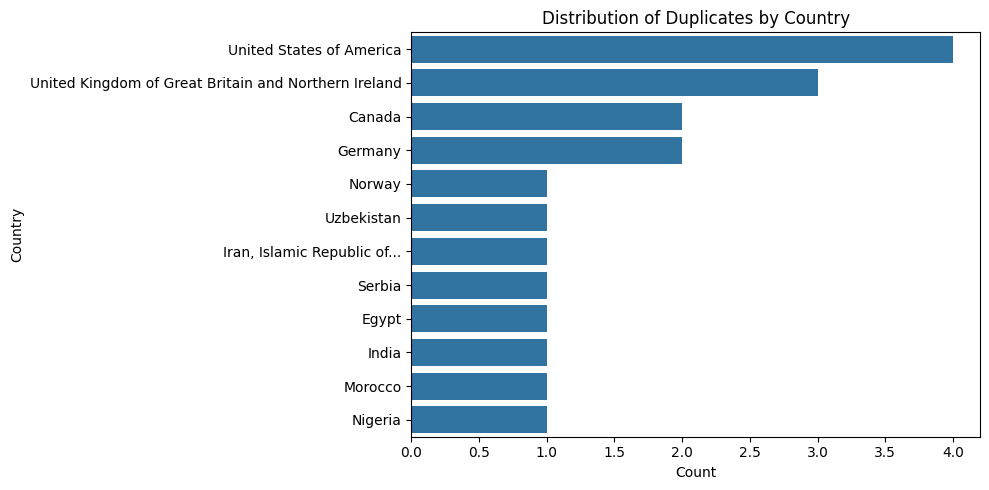

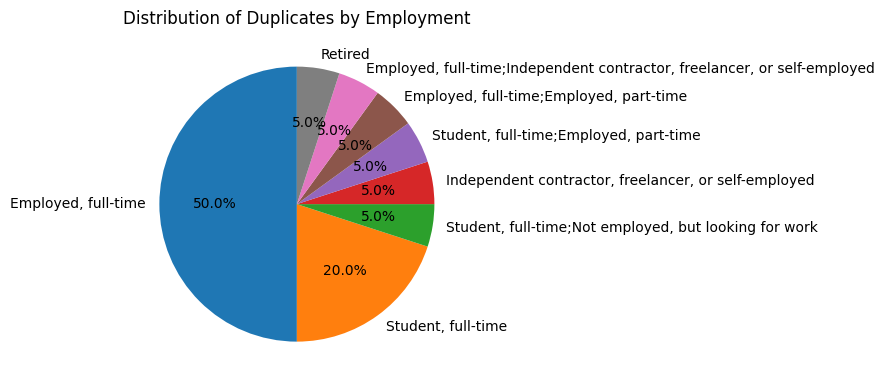

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

duplicate_rows = df[df.duplicated()]

plt.figure(figsize=(10, 5))
sns.countplot(data=duplicate_rows, y='Country', order=duplicate_rows['Country'].value_counts().index)
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
duplicate_rows['Employment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Duplicates by Employment')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [10]:
critical_columns = ['MainBranch', 'Employment', 'RemoteWork', 'Country']

df_unique = df.drop_duplicates(subset=critical_columns)

print("Original dataset shape:", df.shape)
print("New dataset shape after removing duplicates based on critical columns:", df_unique.shape)

Original dataset shape: (65457, 114)
New dataset shape after removing duplicates based on critical columns: (6941, 114)


In [12]:
# I used duplicated() to find repeated rows and checked how many there were. Then I removed the duplicates using important columns with drop_duplicates() and saw how much the data got cleaned.

In [ ]:
# I picked columns like MainBranch, Employment, and RemoteWork because they tell key info about each person. If those are the same, it probably means it's a duplicate.